# Introduction to Computer Vision
## 2B-L1 Hough transform: Lines
### 12. Hough Demo

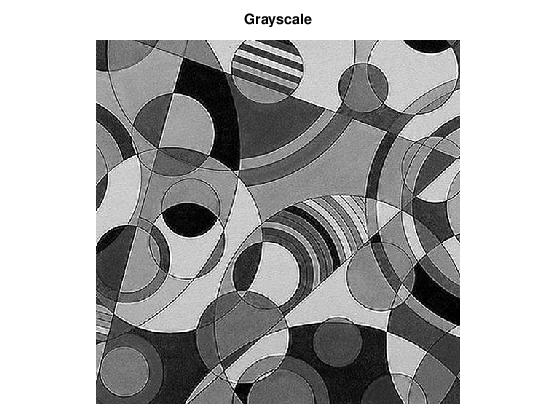

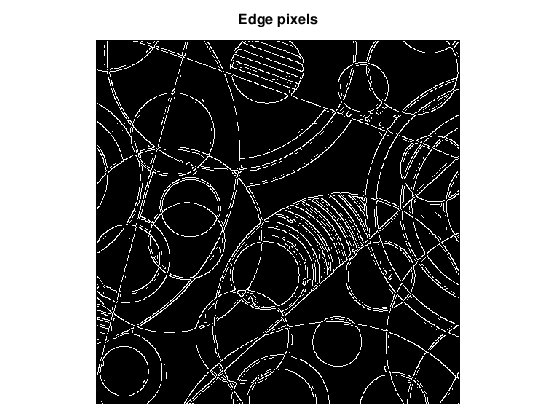

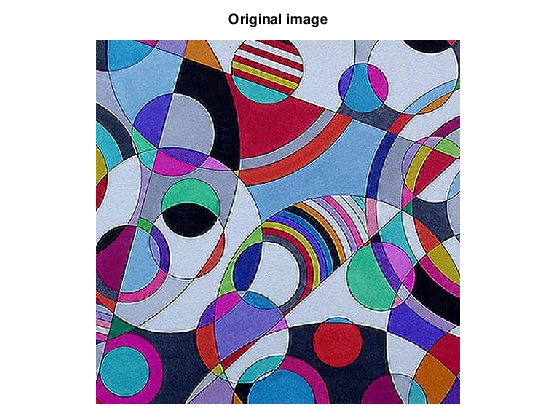

In [62]:
% Hough Demo

pkg load image;

%% Load image, convert to grayscale and apply Canny operator to find edge pixels
img = imread('images/shapes.png');
grays = rgb2gray(img);
edges = edge(grays, 'canny');

figure, imshow(img), title('Original image');
figure, imshow(grays), title('Grayscale');
figure, imshow(edges), title('Edge pixels');

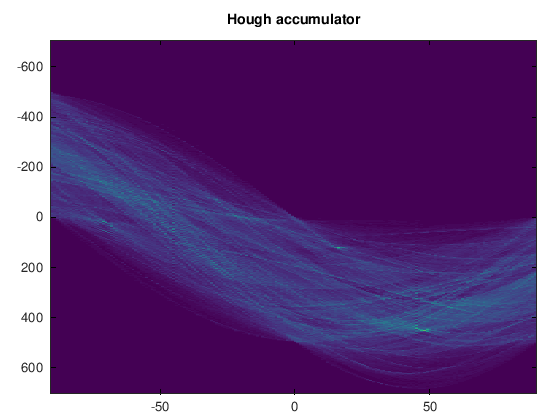

In [72]:
%% Apply Hough transform to find candidate lines
[accum theta rho] = hough(edges);
figure, imagesc(theta, rho, accum), title('Hough accumulator');

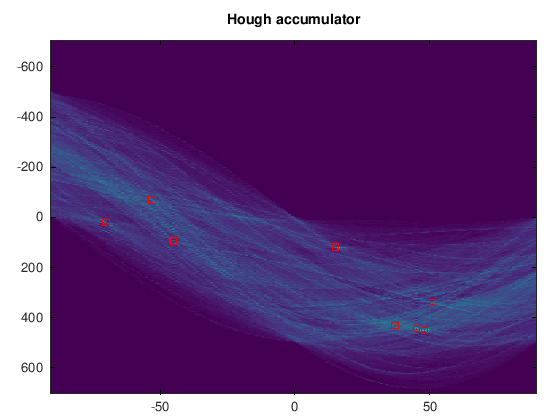

In [80]:
%% Apply Hough transform to find candidate lines
[accum theta rho] = hough(edges);
figure, imagesc(theta, rho, accum), title('Hough accumulator');

%% Find peaks in the Hough accumulator matrix
peaks = houghpeaks(accum, 100);
hold on; plot(theta(peaks(:, 2)), rho(peaks(:, 1)), 'rs'); hold off;

In [65]:
size(peaks)

ans =

   8   2



In [66]:
%% Find lines (segments) in the image
line_segs = houghlines(edges, theta, rho, peaks);
line_segs

line_segs =

  1x17 struct array containing the fields:

    point1
    point2
    theta
    rho



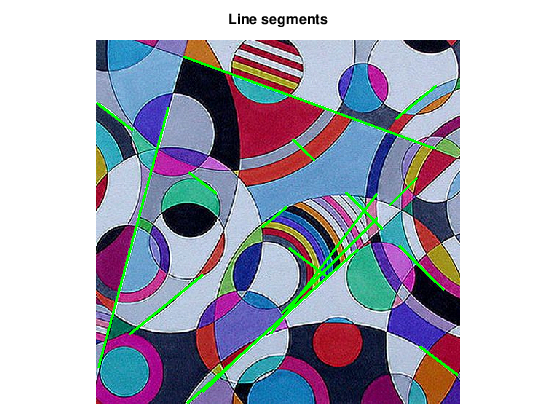

In [68]:
figure, imshow(img), title('Line segments');
hold on;
for k = 1:length(line_segs)
    endpoints = [line_segs(k).point1; line_segs(k).point2];
    plot(endpoints(:, 1), endpoints(:, 2), 'LineWidth', 5, 'Color', 'green');
end
hold off;

In [76]:
%% Alt.: More precise lines
peaks = houghpeaks(accum, 100, 'Threshold', ceil(0.6 * max(accum(:))), 'NHoodSize', [5 5]);
size(peaks)

ans =

   4   2



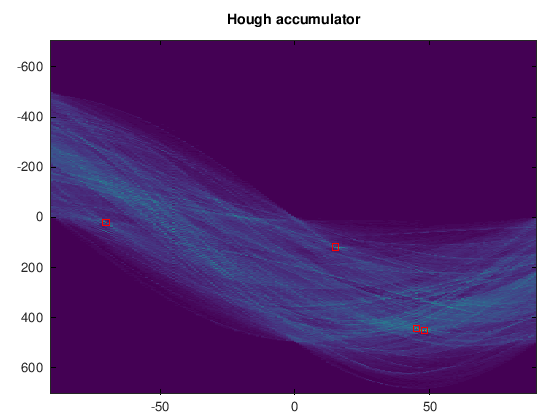

In [79]:
figure, imagesc(theta, rho, accum), title('Hough accumulator');
hold on; plot(theta(peaks(:, 2)), rho(peaks(:, 1)), 'rs'); hold off;

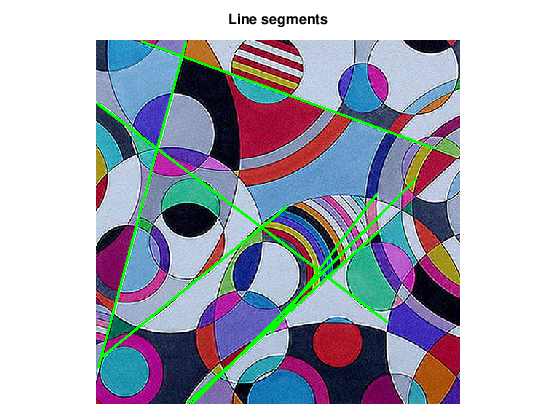

In [85]:
line_segs = houghlines(edges, theta, rho, peaks, 'FillGap', 50, 'MinLength', 200);

figure, imshow(img), title('Line segments');
hold on;
for k = 1:length(line_segs)
    endpoints = [line_segs(k).point1; line_segs(k).point2];
    plot(endpoints(:, 1), endpoints(:, 2), 'LineWidth', 5, 'Color', 'green');
end
hold off;